# Homework 4 notes

---



## 1. Odds ratios, main effects and interactions (50%)

We read in the emergency department triage data.

In [1]:
# downloading data file from Dryad
dryadFileDownload <- function(filenum,filename,baseurl="https://datadryad.org/api/v2")
{
    download.file(paste(baseurl,"/files/",filenum,"/download",sep=""),filename,mode="wb")
}
# make a temporaty filename with RDA extension
tmpfile <- tempfile(fileext="rda")
# download that file
emergencyFileID <- "27091"
dryadFileDownload(emergencyFileID,tmpfile)
# load it
load(tmpfile)
# assign it to a different name as it has an unhelpful name
emergency <- data
rm(data)
head(emergency)

triage age sex    crp        k        na       hb  crea     leu   alb     
2430 yellow 75  female 281.101300 3.266996 135.5883 8.4 34.50495 24.61 22.25447
4250 red    21  female   3.470628 4.014938 137.3804 7.9 61.14286 18.69       NA
5002 green  83  female  19.913540 4.254919 132.2926 7.5 61.46023 12.25 43.55455
5375 orange 71  male    32.092750 4.900000 135.0000 9.9 89.00000 16.39 39.17460
1424 yellow 86  female  76.256850 3.600000 138.0000 7.6 92.00000 14.53 40.15953
1057 yellow 84  female   2.324502 3.300000 140.0000 7.2 76.00000  5.17 44.07696
     ⋯ mort30 icutime icustatus inddage genindl.1 saturation
2430 ⋯ 0      999999  0         23      0         97        
4250 ⋯ 0      999999  0          2      0         99        
5002 ⋯ 0      999999  0          1      0         97        
5375 ⋯ 1           0  1          1      0         NA        
1424 ⋯ 0      999999  0          1      0         97        
1057 ⋯ 0      999999  0          3      0         97        
     respirationsfrekvens puls systoliskblodtryk gcs
2430 20                   124  120               15 
4250 18                   102  164               15 
5002 16                    87  156               15 
5375 NA                    NA   NA               14 
1424 20                    69  150               14 
1057 20                    70  167               15

In [2]:
head(emergency, 3)

triage age sex    crp        k        na       hb  crea     leu   alb     
2430 yellow 75  female 281.101300 3.266996 135.5883 8.4 34.50495 24.61 22.25447
4250 red    21  female   3.470628 4.014938 137.3804 7.9 61.14286 18.69       NA
5002 green  83  female  19.913540 4.254919 132.2926 7.5 61.46023 12.25 43.55455
     ⋯ mort30 icutime icustatus inddage genindl.1 saturation
2430 ⋯ 0      999999  0         23      0         97        
4250 ⋯ 0      999999  0          2      0         99        
5002 ⋯ 0      999999  0          1      0         97        
     respirationsfrekvens puls systoliskblodtryk gcs
2430 20                   124  120               15 
4250 18                   102  164               15 
5002 16                    87  156               15

### a. Tabulate the 30-day mortality variable (`mort30`). Calculate the probability of death, and the odds of death.

#### Tabulation

In [3]:
library(tidyverse)
library(magrittr)
# Tabulate the 30-day mortality variable (mort30) 
mort30tab <- table(emergency$mort30,
                   dnn=c("mortality")) |> data.frame() %T>% print()

── Attaching core tidyverse packages ──────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




  mortality Freq
1         0 5921
2         1  328


#### Probability of death

In [4]:
# probability of death
(mort30tab$Freq[2] / sum(mort30tab$Freq)) |> round(3)

[1] 0.052

#### Odds of death

In [5]:
# odds of death
(mort30tab$Freq[2] / mort30tab$Freq[1]) |>round(3)

[1] 0.055

### b. Calculate the odds of death separately by the readmission variable (`genindl.1`).  Then calculate the odds ratio and the log odds.

#### Tabulation

In [6]:
mort30Readmission <- group_by(emergency,genindl.1) |> 
             summarize( propDied=mean(mort30) ) |> 
             mutate(oddsOfDeath= propDied/(1-propDied)) %T>% print()

# A tibble: 2 × 3
  genindl.1 propDied oddsOfDeath
      <dbl>    <dbl>       <dbl>
1         0   0.0449      0.0470
2         1   0.0988      0.110 


#### Odds ratio

In [7]:
# calculate odds ratio
(mort30Readmission$oddsOfDeath[2] / mort30Readmission$oddsOfDeath[1]) |> round(3)

[1] 2.331

#### Log odds ratio

In [8]:
# calculate log odds ratio
(mort30Readmission$oddsOfDeath[2] / mort30Readmission$oddsOfDeath[1]) |>
     log() |> round(3)

[1] 0.846

### c. Use logistic regression to calculate the same odds ratio.

In [9]:
# logistic regression
( out1 <- glm(mort30 ~ genindl.1, family=binomial, data=emergency) ) |> summary()


Call:
glm(formula = mort30 ~ genindl.1, family = binomial, data = emergency)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.0575     0.0659 -46.393  < 2e-16 ***
genindl.1     0.8463     0.1308   6.472 9.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2571.8  on 6248  degrees of freedom
Residual deviance: 2534.8  on 6247  degrees of freedom
AIC: 2538.8

Number of Fisher Scoring iterations: 5


In [10]:
# log odds ratio
coef(out1)[2] |> round(3)

genindl.1 
    0.846

In [11]:
# odds ratio
coef(out1)[2] |> exp() |> round(3)

genindl.1 
    2.331

We get the same odds ratio and log odds ratio from logistic regression.

### d. Does the odds ratio for readmission vary by sex?  Calculate the readmission odds ratio separately by sex, and then take the ratio.

A simple way to calculate the probability of death by readmission and by gender is to use a three way contengency table.

In [12]:
# 3 way table
tblMort30 <- table(emergency$sex, emergency$`genindl.1`, emergency$mort30)
# flat table print
tblMort30 |> ftable()

             0    1
                   
female 0  2673  113
       1   405   45
male   0  2454  128
       1   389   42

In [13]:
# calculate probabilities of death by readmission and by gender
tblProbMort30 <- tblMort30[,,2]/(tblMort30[,,1]+tblMort30[,,2])
tblProbMort30

        
                  0          1
  female 0.04055994 0.10000000
  male   0.04957397 0.09744780

In [14]:
# calculate odds of death by readmission and by gender
tblOddsMort30 <- tblProbMort30/(1-tblProbMort30)
tblOddsMort30

        
                  0          1
  female 0.04227460 0.11111111
  male   0.05215974 0.10796915

In [15]:
# calculate the odds ratio for readmission by gender
orRdmnMort30 <- tblOddsMort30[,2]/tblOddsMort30[,1]
orRdmnMort30

female     male 
2.628319 2.069971

In [16]:
orMort30 <- orRdmnMort30[2]/orRdmnMort30[1]
orMort30  %>% unname %>% round(3)

[1] 0.788

A simpler and more elegant way to get the same results makes use of the function `by()`.

In [17]:
# split the dataset by sex
# calculate the odds ratio in each sex subset
orBySex <- by(emergency, emergency$sex, 
         \(d) fisher.test(d$mort30,d$genindl.1)$estimate ) |> c() 
orBySex |> round(3)

female   male 
 2.627  2.069

In [18]:
# calculate the odds ratio for gender
(orBySex[2]/orBySex[1]) |> round(3)

male 
0.788

### e. Use logistic regression to calculate the same odds ratio (hint: it corresponds to an interaction term).

In [19]:
# logistic regression
out2 <- glm(mort30 ~ genindl.1*sex, family=binomial, data=emergency)
summary(out2)


Call:
glm(formula = mort30 ~ genindl.1 * sex, family = binomial, data = emergency)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -3.16357    0.09604 -32.940  < 2e-16 ***
genindl.1          0.96634    0.18416   5.247 1.54e-07 ***
sexmale            0.21012    0.13207   1.591    0.112    
genindl.1:sexmale -0.23881    0.26175  -0.912    0.362    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2571.8  on 6248  degrees of freedom
Residual deviance: 2532.3  on 6245  degrees of freedom
AIC: 2540.3

Number of Fisher Scoring iterations: 6


In [20]:
coef(out2)[4] %>% exp %>% round(3)

genindl.1:sexmale 
            0.788

We get the same answer as calculating by hand.

## 2. Non-linear modeling (50%)

We will perform non-linear modeling with logistic regression.  Use
frog abnormalities data.  We will use the abnormalities (`ABNORMAL`)
and tail length (`TAIL_LENGTH`) variables.

In [21]:
# downloading data file from Dryad
dryadFileDownload <- function(filenum,filename,baseurl="https://datadryad.org/api/v2")
{
    download.file(paste(baseurl,"/files/",filenum,"/download",sep=""),filename,mode="wb")
}
frogFileID <- "101077"
tmpfile <- tempfile(fileext="csv")
dryadFileDownload(frogFileID,tmpfile)
frog <- read.csv(tmpfile)
head(frog)
frog <- data.frame("tl" = frog$TAIL_LENGTH, "abnormal" = frog$ABNORMAL)

COLLECTION_ID        FROG_ID GOSNER_STAGE SVL TAIL_LENGTH
1 KNA1021-RASY-080712  15      45           17   2         
2 KNA1024-RASY-080812  13      44           22  20         
3 KNA1069-RASY-080612  24      45           18   1         
4 KNA1090-RASY-080612  5       45           17   3         
5 KNA11119-RASY-081612 26      44           20  17         
6 KNA1024-RASY-080812  47      44           21  33         
  FROG_COMMENTS                                                                                                                                         
1                                                                                                                                                       
2                                                                                                                                                       
3                                                                                                                                                       
4                                                                                                                                                       
5                                                                                                                                                       
6 ~ 3mm of right thigh is comparable to left, remainder of thigh/calf are underdeveloped and foot is not fully developed, digits are not differentiated.
  ABNORMAL BLEEDING_INJ SKEL_AB EYE_AB SURF_AB Perkensus SITE      DATE     
1 0        0            0       0      0       0         KNA1021   8/7/2012 
2 0        0            0       0      0       0         KNA1024   8/8/2012 
3 0        0            0       0      0       0         DNR1069   8/6/2012 
4 0        0            0       0      0       0         KEN1090   8/6/2012 
5 0        0            0       0      0       0         KNA111-19 8/16/2012
6 1        0            1       0      0       0         KNA1024   8/8/2012 
  YEAR
1 2012
2 2012
3 2012
4 2012
5 2012
6 2012

In [22]:
head(frog)

tl abnormal
1  2 0       
2 20 0       
3  1 0       
4  3 0       
5 17 0       
6 33 1

### a. Use logistic regression to study the association of abnormalities and tail length.

In [23]:
out1 <- glm(abnormal ~ tl, family=binomial, data=frog)
summary(out1)


Call:
glm(formula = abnormal ~ tl, family = binomial, data = frog)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.901433   0.053612 -35.466  < 2e-16 ***
tl           0.012374   0.002341   5.285 1.26e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6695.5  on 7703  degrees of freedom
Residual deviance: 6667.3  on 7702  degrees of freedom
  (1307 observations deleted due to missingness)
AIC: 6671.3

Number of Fisher Scoring iterations: 4


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




   Test stat Pr(>|Test stat|)   
tl    10.317         0.001318 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


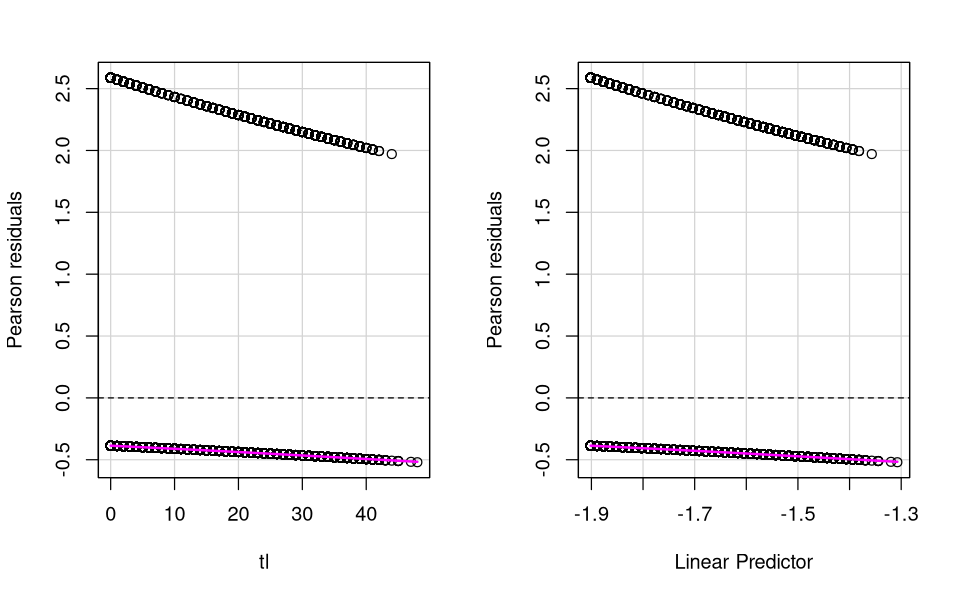

In [24]:
library(car)
# set plot size
options(repr.plot.width=8, repr.plot.height=5)
residualPlots(out1)

There is a downward trend in this residual plot.

### b. What is the meaning of the regression coefficient in the output of `glm` command?

The estimated coefficient for the intercept is the log odds of a frog with a tail length of 0 being abnormal. The odds of being abnormal when the tail length is 0 is :

In [25]:
coef(out1)[1] %>% exp %>% round(3)

(Intercept) 
      0.149

For a one-unit increase in the tail length, the expected change in log odds is the coefficient:

In [26]:
coef(out1)[2] %>% round(3) 

tl 
0.012

Or, for a one-unit increase in the tail length, the expected change in odds is:

In [27]:
coef(out1)[2] %>% exp %>%  round(3) 

tl 
1.012

We can say that for one-unit increase in tail length, we expect to see about 1.2%  increase in the odds of being abnormal.

### c. Add a quadratic term for tail length.  Does it improve the fit? How do you know that it improves fit?

#### Adding a quadratic term

In [28]:
out2 <- glm(abnormal ~ tl + I(tl^2), family=binomial, data=frog)
summary(out2)


Call:
glm(formula = abnormal ~ tl + I(tl^2), family = binomial, data = frog)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.9937951  0.0620088 -32.153  < 2e-16 ***
tl           0.0406289  0.0091479   4.441 8.94e-06 ***
I(tl^2)     -0.0008309  0.0002605  -3.190  0.00142 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6695.5  on 7703  degrees of freedom
Residual deviance: 6657.0  on 7701  degrees of freedom
  (1307 observations deleted due to missingness)
AIC: 6663

Number of Fisher Scoring iterations: 4


        Test stat Pr(>|Test stat|)
tl          0.000            1.000
I(tl^2)     0.095            0.758


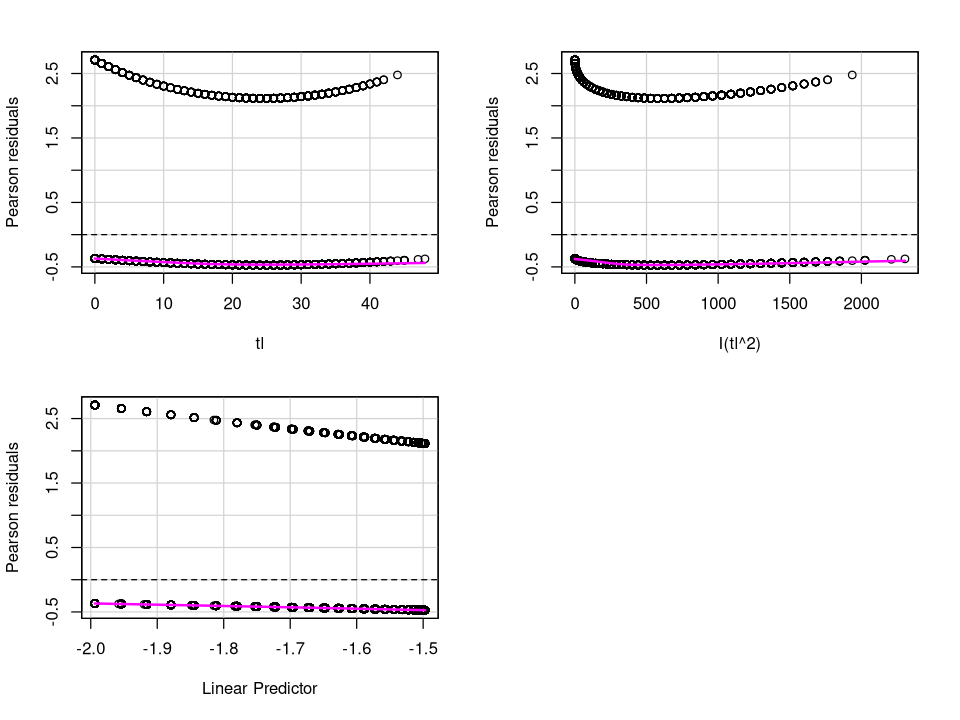

In [29]:
# set plot size
options(repr.plot.width=8, repr.plot.height=6)
residualPlots(out2)

We do not see any pattern in the residuals of this plot.

In [30]:
anova(out1,out2,test="LRT")

Resid. Df Resid. Dev Df Deviance Pr(>Chi)   
1 7702      6667.292   NA       NA          NA
2 7701      6656.975    1 10.31664 0.001318358

The ANOVA table with the likelihood ratio test indicates that the
quadratic term is a better fit than just the linear term for tail length.

### d. Create a new variable by dividing the range of tail length into 10 intervals, and calculate the proportion of abnormalities in each of these categories.

In [31]:
# set plot size
options(repr.plot.width=8, repr.plot.height=5)

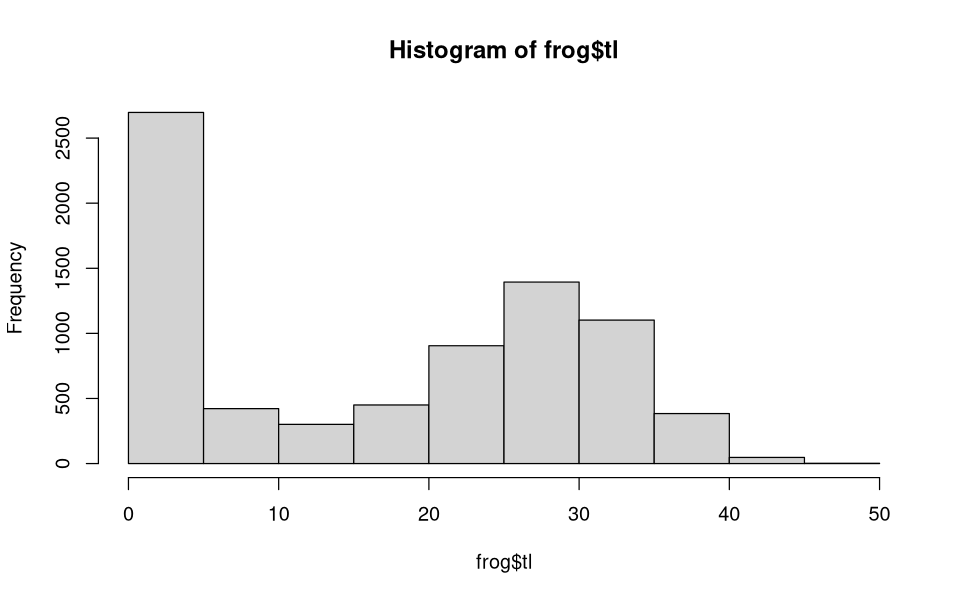

In [32]:
hist(frog$tl)

We check the distribution of tail length and create categories based on the range of tail length which goes from 0 to 48. If we categorize by 5mm, then we will have 10 categories -- the last two will be sparse.

In [33]:
# create 10 categories
frogCtgrs <- na.omit(frog)
summary(frogCtgrs)

       tl           abnormal     
 Min.   : 0.00   Min.   :0.0000  
 1st Qu.: 2.00   1st Qu.:0.0000  
 Median :20.00   Median :0.0000  
 Mean   :17.02   Mean   :0.1569  
 3rd Qu.:30.00   3rd Qu.:0.0000  
 Max.   :48.00   Max.   :1.0000  

In [34]:
frogCtgrs

tl abnormal
1     2 0       
2    20 0       
3     1 0       
4     3 0       
5    17 0       
6    33 1       
7    16 1       
8     1 1       
9     2 1       
10    0 1       
11   40 1       
12   32 1       
13    0 1       
14    0 1       
15   32 1       
16    1 1       
17    1 1       
18   22 1       
19   30 1       
20    0 1       
21    1 1       
22    0 1       
23   33 1       
24    0 1       
25    3 1       
26   22 1       
27    4 1       
28    6 1       
29    1 1       
30   20 1       
⋮    ⋮  ⋮       
8966 0  0       
8967 0  0       
8968 0  0       
8969 0  0       
8970 0  0       
8971 0  0       
8972 0  0       
8973 0  0       
8974 0  0       
8975 0  0       
8976 0  0       
8977 0  0       
8978 0  0       
8979 0  0       
8980 0  0       
8981 0  0       
8982 0  0       
8983 0  0       
8984 0  0       
9001 0  0       
9002 0  0       
9003 0  0       
9004 0  0       
9005 0  0       
9006 0  0       
9007 0  0       
9008 0  0       
9009 0  0       
9010 0  0       
9011 0  1

In [35]:
# Create 10 tail length categories 
catTL <- cut(frogCtgrs$tl,breaks=seq(0,50,by=5), include.lowest = T, 
             ordered_result=T)
levels(catTL)

[1] "[0,5]"   "(5,10]"  "(10,15]" "(15,20]" "(20,25]" "(25,30]" "(30,35]"
 [8] "(35,40]" "(40,45]" "(45,50]"

In [36]:
# store catTL in data frame
frogCtgrs$tlcat <- catTL
head(frogCtgrs, 3)

tl abnormal tlcat  
1  2 0        [0,5]  
2 20 0        (15,20]
3  1 0        [0,5]

Now we summarize the proportion of abnormalities by categories of tail length.  The last two are not reliable because of small numbers.

In [37]:
byTailLength <- tapply(frogCtgrs$abnormal, frogCtgrs$tlcat, 
                       mean,na.rm=T) |> data.frame(abnormalProp=_)
byTailLength <- data.frame(tlCat=ordered(rownames(byTailLength),
                                         levels=levels(catTL)),
                           abnormalProp=byTailLength$abnormalProp)
byTailLength

tlCat   abnormalProp
1  [0,5]   0.1234705   
2  (5,10]  0.1469194   
3  (10,15] 0.1794020   
4  (15,20] 0.1866667   
5  (20,25] 0.1668508   
6  (25,30] 0.1929699   
7  (30,35] 0.1678766   
8  (35,40] 0.1614583   
9  (40,45] 0.1914894   
10 (45,50] 0.0000000

### e. Plot the proportion of abnormalities as a function of tail length category. Is it consistent with your logistic regression output?

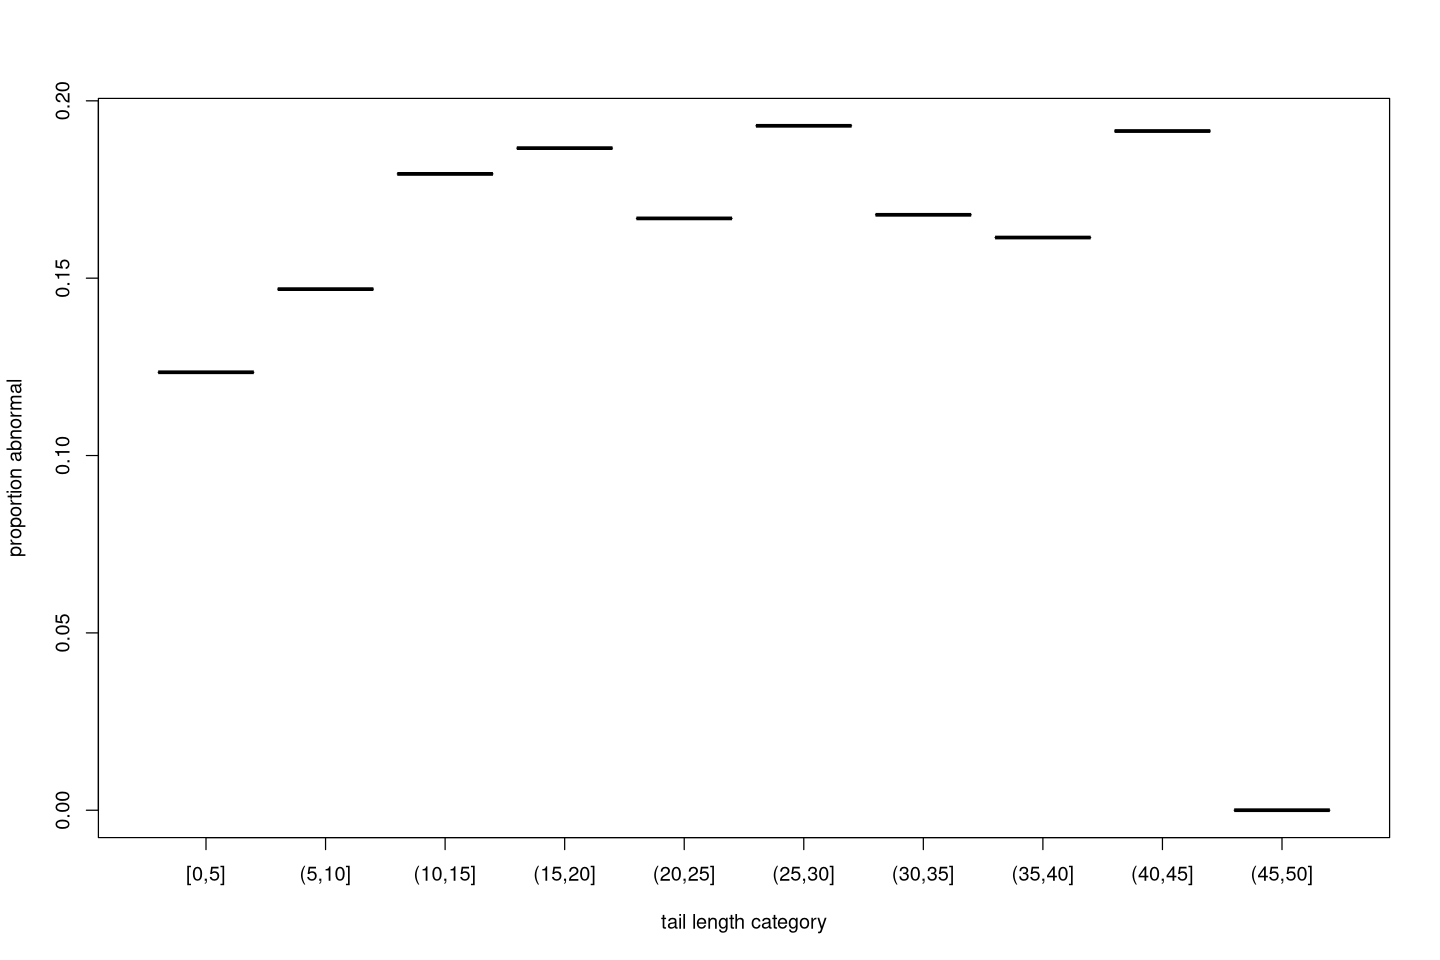

In [38]:
options(repr.plot.width=12, repr.plot.height=8)
plot(byTailLength$tlCat,byTailLength$abnormalProp,
     xlab="tail length category",ylab="proportion abnormal")

In the above plot (disregarding the last two), we can see an increasing pattern and then a flattening or downward trend.

To compare with the predictions from logistic regression with a quadratic term we calculate the fitted values and average them.  Then we plot on the same figure.

In [39]:
# estimate fitted values
frogCtgrs$hat2 <- fitted(out2)
byTailLength$hat2 <- tapply(frogCtgrs$hat2, frogCtgrs$tlcat,mean) |> c()
byTailLength

tlCat   abnormalProp hat2     
1  [0,5]   0.1234705    0.1244576
2  (5,10]  0.1469194    0.1511891
3  (10,15] 0.1794020    0.1669960
4  (15,20] 0.1866667    0.1780302
5  (20,25] 0.1668508    0.1824110
6  (25,30] 0.1929699    0.1809325
7  (30,35] 0.1678766    0.1743555
8  (35,40] 0.1614583    0.1628430
9  (40,45] 0.1914894    0.1474838
10 (45,50] 0.0000000    0.1257896

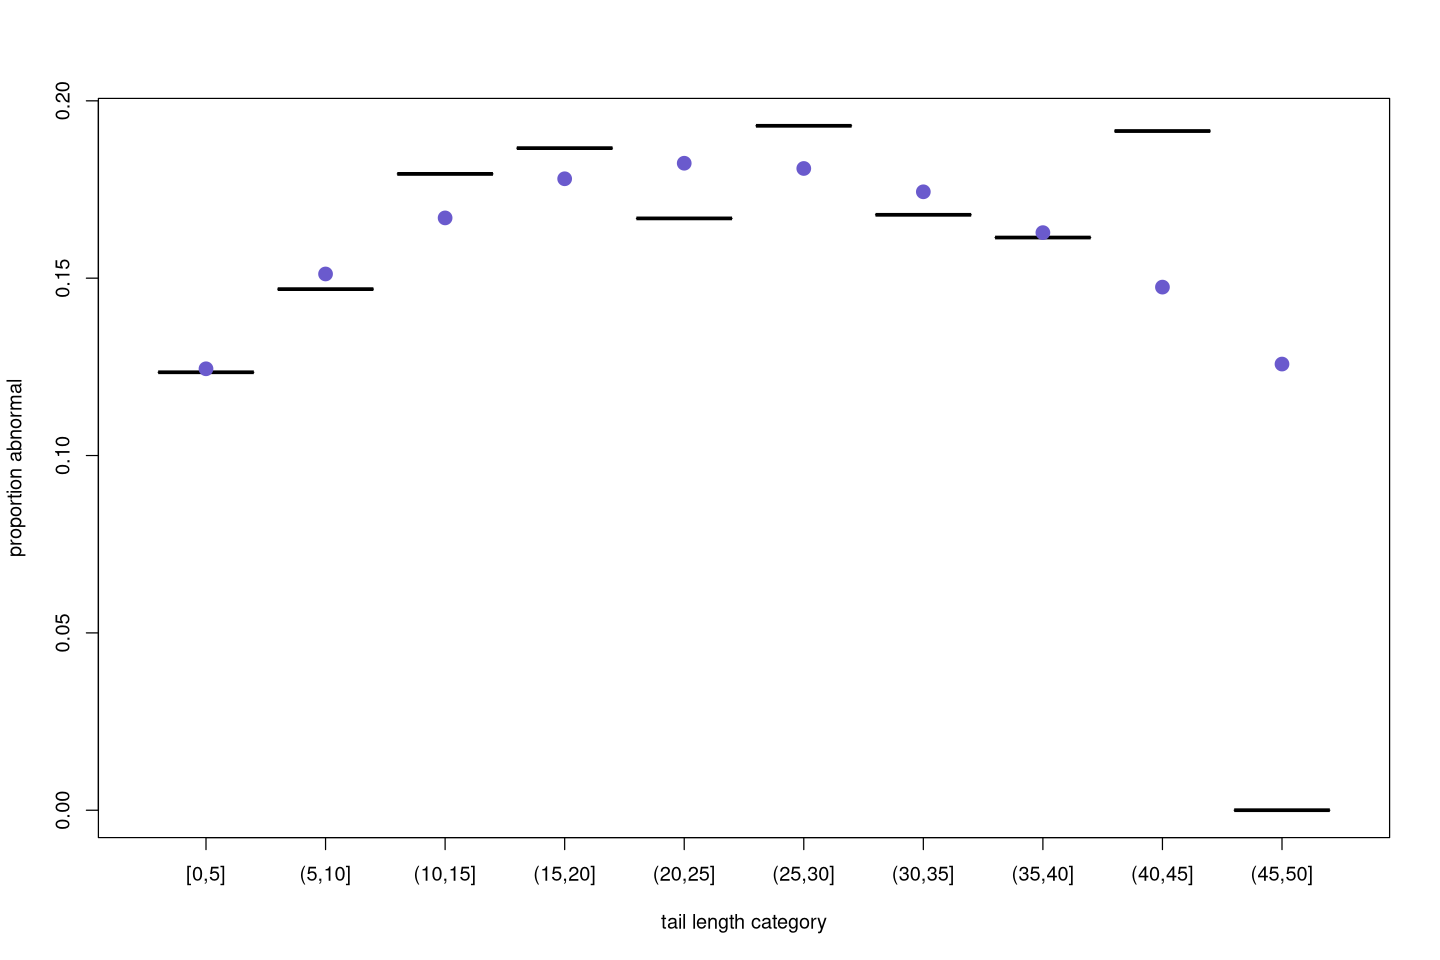

In [40]:
plot(byTailLength$tlCat,byTailLength$abnormalProp,
     xlab="tail length category",ylab="proportion abnormal")
points(byTailLength$tlCat,byTailLength$hat2,pch=19,col="slateblue",cex=1.5)

Let plot the results of the linear model without the quadratic term.

In [41]:
# estimate fitted values
frogCtgrs$hat1 <- fitted(out1)
byTailLength$hat1 <- tapply(frogCtgrs$hat1, frogCtgrs$tlcat,mean) |> c()

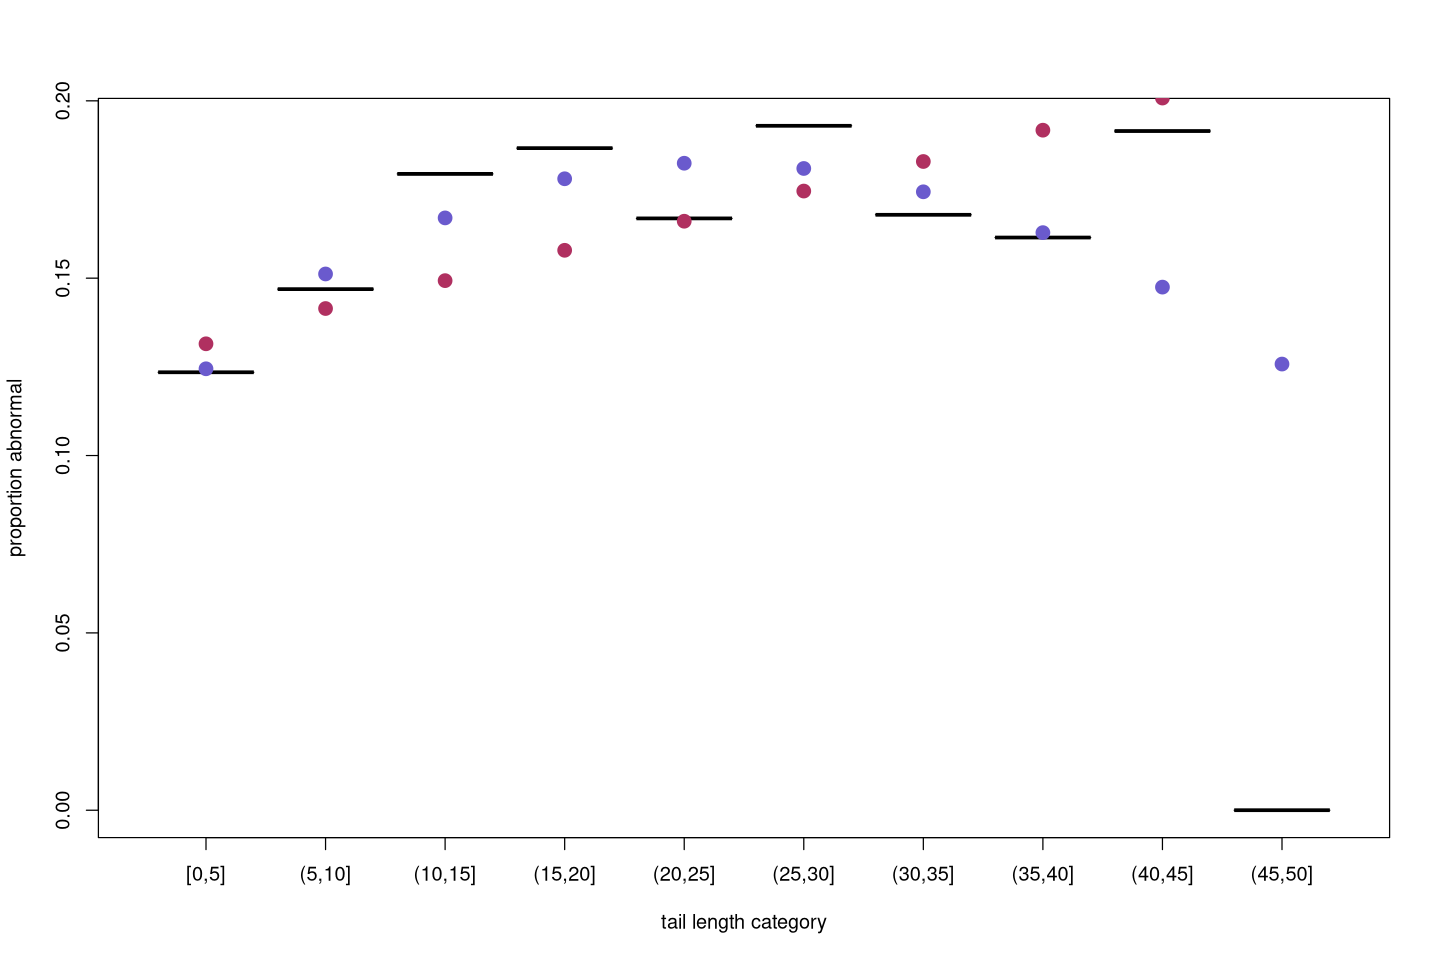

In [42]:
plot(byTailLength$tlCat,byTailLength$abnormalProp,
     xlab="tail length category",ylab="proportion abnormal")
points(byTailLength$tlCat,byTailLength$hat2,pch=19,col="slateblue",cex=1.5)
points(byTailLength$tlCat,byTailLength$hat1,pch=19,col="maroon",cex=1.5)

In [43]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Debian GNU/Linux trixie/sid

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] car_3.1-2       carData_3.0-5   magrittr_2.0.3  lubridate_1.9.3
 [5] forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4     purrr_1.0.2    
 [9] readr_2.1.5     tid